# StringApplet to SageMath converter

This is a manual of [`converter.py`](https://github.com/haruhisa-enomoto/StringApplet-to-SageMath-converter).
It converts the exported tex file produced by [String Applet](https://www.math.uni-bielefeld.de/~jgeuenich/string-applet/)
into a data which we can use to construct the poset of torsion classes in [SageMath](https://www.sagemath.org/).

## String Applet

[String Applet](https://www.math.uni-bielefeld.de/~jgeuenich/string-applet/) is a web program developed by [Jan Geuenich](https://www.math.uni-bielefeld.de/~jgeuenich/), which is a **very** useful tool when we want to observe (and play with) concrete examples in the representation theory of algebras. Here are the description from the site.

This web program can deal with special biserial algebras, string algebras, and gentle algebras, thus a large class of algebras (you don't have to know definitions to use it, since this program automatically checks whether your inputed algebra is OK). After inputing your algebra, it displays many combinatorial invariants of these algebras and their module categories.

We can easily input our finite-dimensional algebras intuitively by a quiver and relations in the left bottom input form.
For example, the following represents an algebra $\Lambda:= k[1 \xrightarrow{a}2 \xrightarrow{b}3]/\langle ab \rangle$.

<img src="SA_default.JPG" alt="Drawing" style="width: 600px;"/>

Then, by clicking **Update**, lots of information on this algebra is shown in the right part.

In particular, String Applet computes the support $\tau$-tilting quiver if a given algebra is representation-finite.
This quiver is nothing but the Hasse quiver of the lattice of torsion classes $\mathsf{tors}\,\Lambda$ like this:

<img src="SA_hasse.JPG" alt="Drawing" style="width: 600px;"/>

*The aim of this code is* **to make this poset available in SageMath.**

## Usage

First, please download [``converter.py``](https://github.com/haruhisa-enomoto/StringApplet-to-SageMath-converter/blob/main/converter.py) in your PC ([this](https://github.com/haruhisa-enomoto/StringApplet-to-SageMath-converter/raw/main/converter.py) is a direct link of this file). It is recommended that you download it in your working directory (where your Jupyter Notebook or Sage file belongs).

### Step 1. Export the tex file from String Applet

The first step is to export the tex file from String Applet **after showing s$\tau$-Tilting quiver**.

1. Input your favorite algebra on String Applet by a quiver with relations, and click "Update" on the left part.
2. Click "$\tau$-Tilting" tab on the right part. Then there is a button "Show" in the s$\tau$-Tilting quiver part.

<img src="SA_show.JPG" alt="Drawing" style="width: 600px;"/>

(If there is no "Show" button, make sure that your algebra is representation-finite, which is shown in the left part.)
3. Click this "Show" button. Then the Hasse quiver will be shown.
4. Place the cursor over "Export", then click "As LaTeX". Then save the latex file in the same directory as [``converter.py``](https://github.com/haruhisa-enomoto/StringApplet-to-SageMath-converter/blob/main/converter.py).

<img src="SA_click.jpg" alt="Drawing" style="width: 600px;"/>

For example, suppose the filename is ``SA.tex``.

## Step 2. Import `converter.py` and use it

Then import `converter.py` in SageMath.
To do this, write as follows.

In [1]:
import converter

- If you are using SageMath on Jupyter Notebook or Interactive Shell, then just write the above and excute it. In this case, make sure that `converter.py` is in your working directory. 
- If you are writing your own SageMath file (like `foo.sage`), then write
```python
import converter
```
in the beginning of your file (also in this case, make sure that `foo.sage` and `converter.py` belong to the same directory.

For simplicity, we assume the former from now on.

After importhing `converter.py`, you can use two functions:

- converter.SAtoSage(`tex_path`)
- converter.export(`tex_path`, `output_path`)

### converter.SAtoSage(`tex_path`)

Return the data which can be used to construct the poset of torsion classes in SageMath from the tex file exported by StringApplet.

INPUT:

- `tex_path` -- a path of the exported tex file.

OUTPUT:

a data from which we can construct poset in SageMath.

EXAMPLE:
Assume that you has `SA.tex` in the working directory. Then for example, we have

In [4]:
data = converter.SAtoSage("SA.tex")
data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [(1, 0),
  (2, 0),
  (3, 0),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 3),
  (4, 2),
  (8, 2),
  (9, 4),
  (6, 5),
  (9, 5),
  (10, 6),
  (8, 7),
  (10, 7),
  (11, 8),
  (11, 9),
  (11, 10)])

This data consists of a tuple `(tors, rels)`, where
- `tors` is a set of torsion classes, indexed by integers.
- `rels` is a covering relations (U,T) of torsion classes. (U,T) is a covering relation if there is a Hasse arrow $U \leftarrow T$.

To construct a poset from this data, you just do the following.

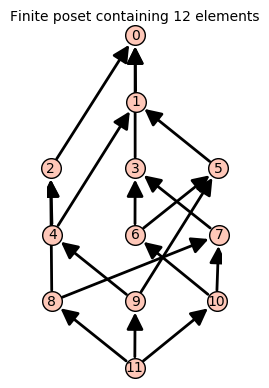

In [10]:
tors_poset = Poset(data)
tors_poset

Note that **the orientation of Hasse quiver in SageMath is opposite to the representation theorist's convention**, so $0$ is the largest torsion class $\mathsf{mod}\, \Lambda$ and $11$ is the smallest torsion class $0$.

In case you want to consider this poset as a lattice, do the following.

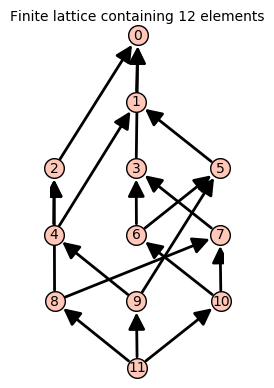

In [11]:
tors_lattice = LatticePoset(data)
tors_lattice

Maybe it's recommended to use `LatticePoset` because we can use more functions. For example, the following count the number of join-irreducible torsion classes.

In [12]:
print("The number of join-irreducible torsion class is")
print(len(tors_lattice.join_irreducibles()))

The number of join-irreducible torsion class is
5


Since join-irreducibles are in bijection with brick, from this, we can conclude that our algebra $\Lambda$ has $5$ bricks!

For further explanation and demonstration on how to use the lattice of torsion classes in SageMath, see [this note](https://nbviewer.jupyter.org/github/haruhisa-enomoto/kappa-map-for-lattices/blob/main/for-rep-theorists.ipynb), which is a manual of another SageMath module [`kappa.py`](https://github.com/haruhisa-enomoto/kappa-map-for-lattices).

In [20]:
export("A2.tex", "output.sage")